In [1]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt

In [2]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [3]:
bs = 1000

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=4)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...



Done!


In [14]:
# Displaying routine
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [8]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU())
        
        self.decoder = nn.Sequential(
        nn.Linear(100, 28*28),
        nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [9]:
### AutoEncoder with CNN 

class AutoEncoder_CNN(nn.Module):
    def __init__(self):
        super(AutoEncoder_CNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1,3,kernel_size=5),
            nn.ReLU(),
            nn.Conv2d(3,4,kernel_size=5),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4,3,kernel_size=5),
            nn.ConvTranspose2d(3,1,kernel_size=5)
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [10]:
model_ae = AutoEncoder_CNN()

In [11]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/5], loss:0.0187
epoch [2/5], loss:0.0178
epoch [3/5], loss:0.0172
epoch [4/5], loss:0.0168
epoch [5/5], loss:0.0166


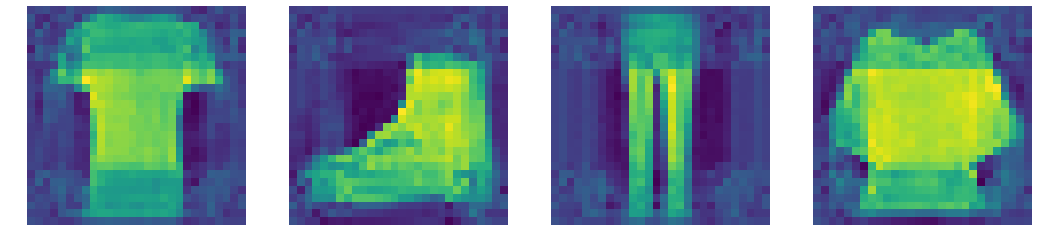

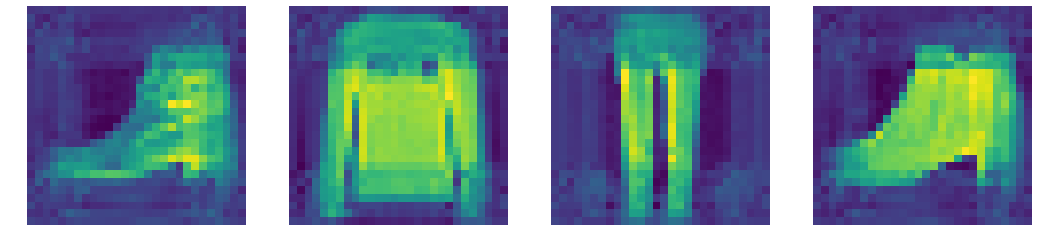

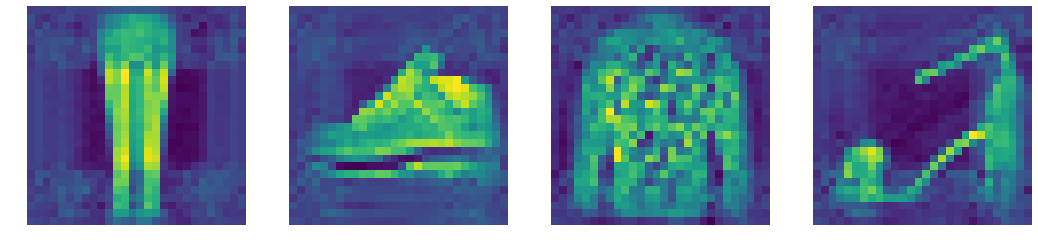

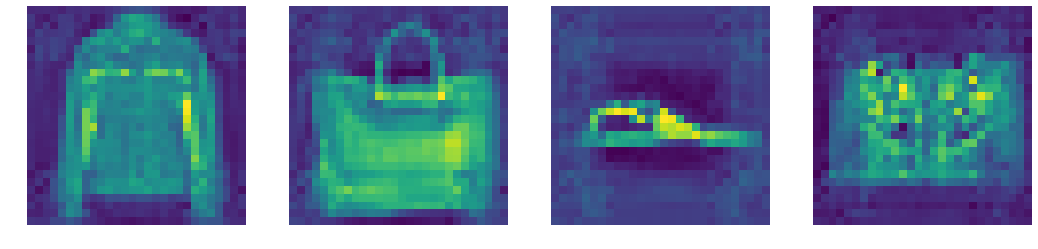

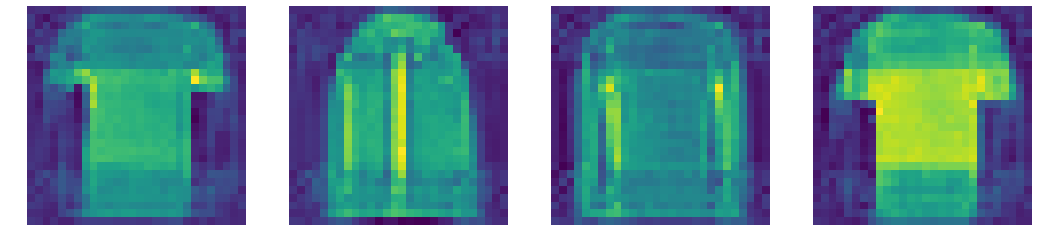

In [21]:
num_epochs = 5
denoising_factor=0.01

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        
        ### Introducing noise
        
        img=img+denoising_factor*torch.randn(img.size())
        
        img.requires_grad_()
        #img = img.view(img.size(0), -1)
        output = model_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)

In [22]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

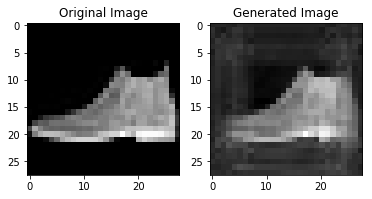

In [26]:
test_images, labels = next(iter(testloader))

#test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

# Exercises

Your exercise should you choose to accept, is to 

1. change the model class to use Convolution Layers and re-run with the same training code in cells below.
2. Edit the code above for denoising autoencoder? (bonus point if your code it)
3. Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder

Deadline: Today: 2:pm

Question 3: Briefly describe the performance of using the fully connected auto-encoder to the CNN_Autoencoder

The CNN_Autoencoder perform better than the fully connected because it conserve the sparsing of the image and improve the loss after the prediction.

### VAE IMPLEMENTATION ASSIGNMENT

In [ ]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import torch.optim as optim
from torch import nn
import matplotlib.pyplot as plt

Number of samples:  60000
0 0.07010014355182648
1 0.07133549451828003
2 0.06841182708740234
3 0.06931647658348083
4 0.06609949469566345
5 0.06836124509572983
6 0.07027174532413483
7 0.07064197957515717
8 0.07068344950675964
9 0.07102975249290466
10 0.06829070299863815
11 0.06951148808002472
12 0.06708869338035583
13 0.06364014744758606
14 0.06260298192501068
15 0.06436660885810852
16 0.06404735147953033
17 0.06531117856502533
18 0.0666300430893898
19 0.0704316645860672
20 0.06571543216705322
21 0.0664922371506691
22 0.06587766855955124
23 0.05838878080248833
24 0.0693918839097023
25 0.06370428204536438
26 0.06782487779855728
27 0.06315135955810547
28 0.06421496719121933
29 0.06745404750108719
30 0.0680193156003952
31 0.06362255662679672
32 0.06912007927894592
33 0.06987889111042023
34 0.0715167298913002
35 0.06841204315423965
36 0.06827174127101898
37 0.06233593076467514
38 0.0678592249751091
39 0.0637073665857315
40 0.0651785135269165
41 0.06744048744440079
42 0.07019960880279541
43 0

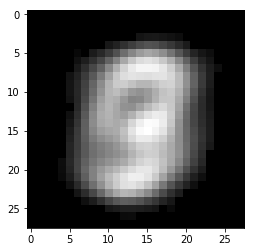

In [35]:
class Normal(object):
    def __init__(self, mu, sigma, log_sigma, v=None, r=None):
        self.mu = mu
        self.sigma = sigma  # either stdev diagonal itself, or stdev diagonal from decomposition
        self.logsigma = log_sigma
        dim = mu.get_shape()
        if v is None:
            v = torch.FloatTensor(*dim)
        if r is None:
            r = torch.FloatTensor(*dim)
        self.v = v
        self.r = r


class Encoder(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Encoder, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        return F.relu(self.linear2(x))


class Decoder(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Decoder, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        return F.relu(self.linear2(x))


class VAE(torch.nn.Module):
    latent_dim = 8

    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self._enc_mu = torch.nn.Linear(100, 8)
        self._enc_log_sigma = torch.nn.Linear(100, 8)

    def _sample_latent(self, h_enc):
        """
        Return the latent normal sample z ~ N(mu, sigma^2)
        """
        mu = self._enc_mu(h_enc)
        log_sigma = self._enc_log_sigma(h_enc)
        sigma = torch.exp(log_sigma)
        std_z = torch.from_numpy(np.random.normal(0, 1, size=sigma.size())).float()

        self.z_mean = mu
        self.z_sigma = sigma

        return mu + sigma * Variable(std_z, requires_grad=False)  # Reparameterization trick

    def forward(self, state):
        h_enc = self.encoder(state)
        z = self._sample_latent(h_enc)
        return self.decoder(z)


def latent_loss(z_mean, z_stddev):
    mean_sq = z_mean * z_mean
    stddev_sq = z_stddev * z_stddev
    return 0.5 * torch.mean(mean_sq + stddev_sq - torch.log(stddev_sq) - 1)


if __name__ == '__main__':

    input_dim = 28 * 28
    batch_size = 32

    transform = transforms.Compose(
        [transforms.ToTensor()])
    mnist = torchvision.datasets.MNIST('./', download=True, transform=transform)

    dataloader = torch.utils.data.DataLoader(mnist, batch_size=batch_size,
                                             shuffle=True, num_workers=2)

    print('Number of samples: ', len(mnist))

    encoder = Encoder(input_dim, 100, 100)
    decoder = Decoder(8, 100, input_dim)
    vae = VAE(encoder, decoder)

    criterion = nn.MSELoss()

    optimizer = optim.Adam(vae.parameters(), lr=0.0001)
    l = None
    for epoch in range(100):
        for i, data in enumerate(dataloader, 0):
            inputs, classes = data
            inputs, classes = Variable(inputs.resize_(batch_size, input_dim)), Variable(classes)
            optimizer.zero_grad()
            dec = vae(inputs)
            ll = latent_loss(vae.z_mean, vae.z_sigma)
            loss = criterion(dec, inputs) + ll
            loss.backward()
            optimizer.step()
            l = loss.item()
        print(epoch, l)

    plt.imshow(vae(inputs).data[0].numpy().reshape(28, 28), cmap='gray')
plt.show(block=True)